# 1 - Import the Libraries

In [59]:
# In order to begin our multiple regression analysis, we first import our necessary libraries as;

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

# 2 - Load Data into Pandas

In [60]:
#Then, we need to import our excel file with csv format as;

df = pd.read_csv('electricitypricesuk.csv')

In [61]:
#Furthermore, we describe it by;

df.describe()

,ElectPrice,OilPrice,GasPrice
count,129.000000,129.000000,129.000000
mean,45.930233,75.783488,2.060930
std,9.064859,27.812875,0.642254
min,24.010000,18.380000,0.590000
25%,40.910000,52.310000,1.560000
50%,44.960000,67.220000,1.920000
75%,50.270000,107.790000,2.740000
max,90.940000,125.450000,3.270000


# 3 - Check for Multicollinearity

,ElectPrice,OilPrice,GasPrice
ElectPrice,1.000000,0.243228,0.226154
OilPrice,0.243228,1.000000,0.985951
GasPrice,0.226154,0.985951,1.000000


<AxesSubplot:>

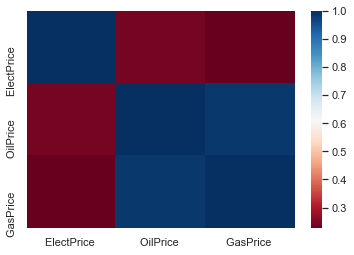

In [62]:
# we can calculate the correlation matrix with
corr = df.corr()

# we can display the correlation matrix with
display(corr)

# we can plot the correlation heatmap with
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

# In the output line we can see the cross-correlation between independent variable electricity prices,
# with our dependent variables oil and gas prices. Our regression value shows relatively low values.
# However we can see a high correlation between our gas and oil prices unsurprisingly.This indicates
# multicollinearity, which is a data problem that could depreciate models explanatory power.

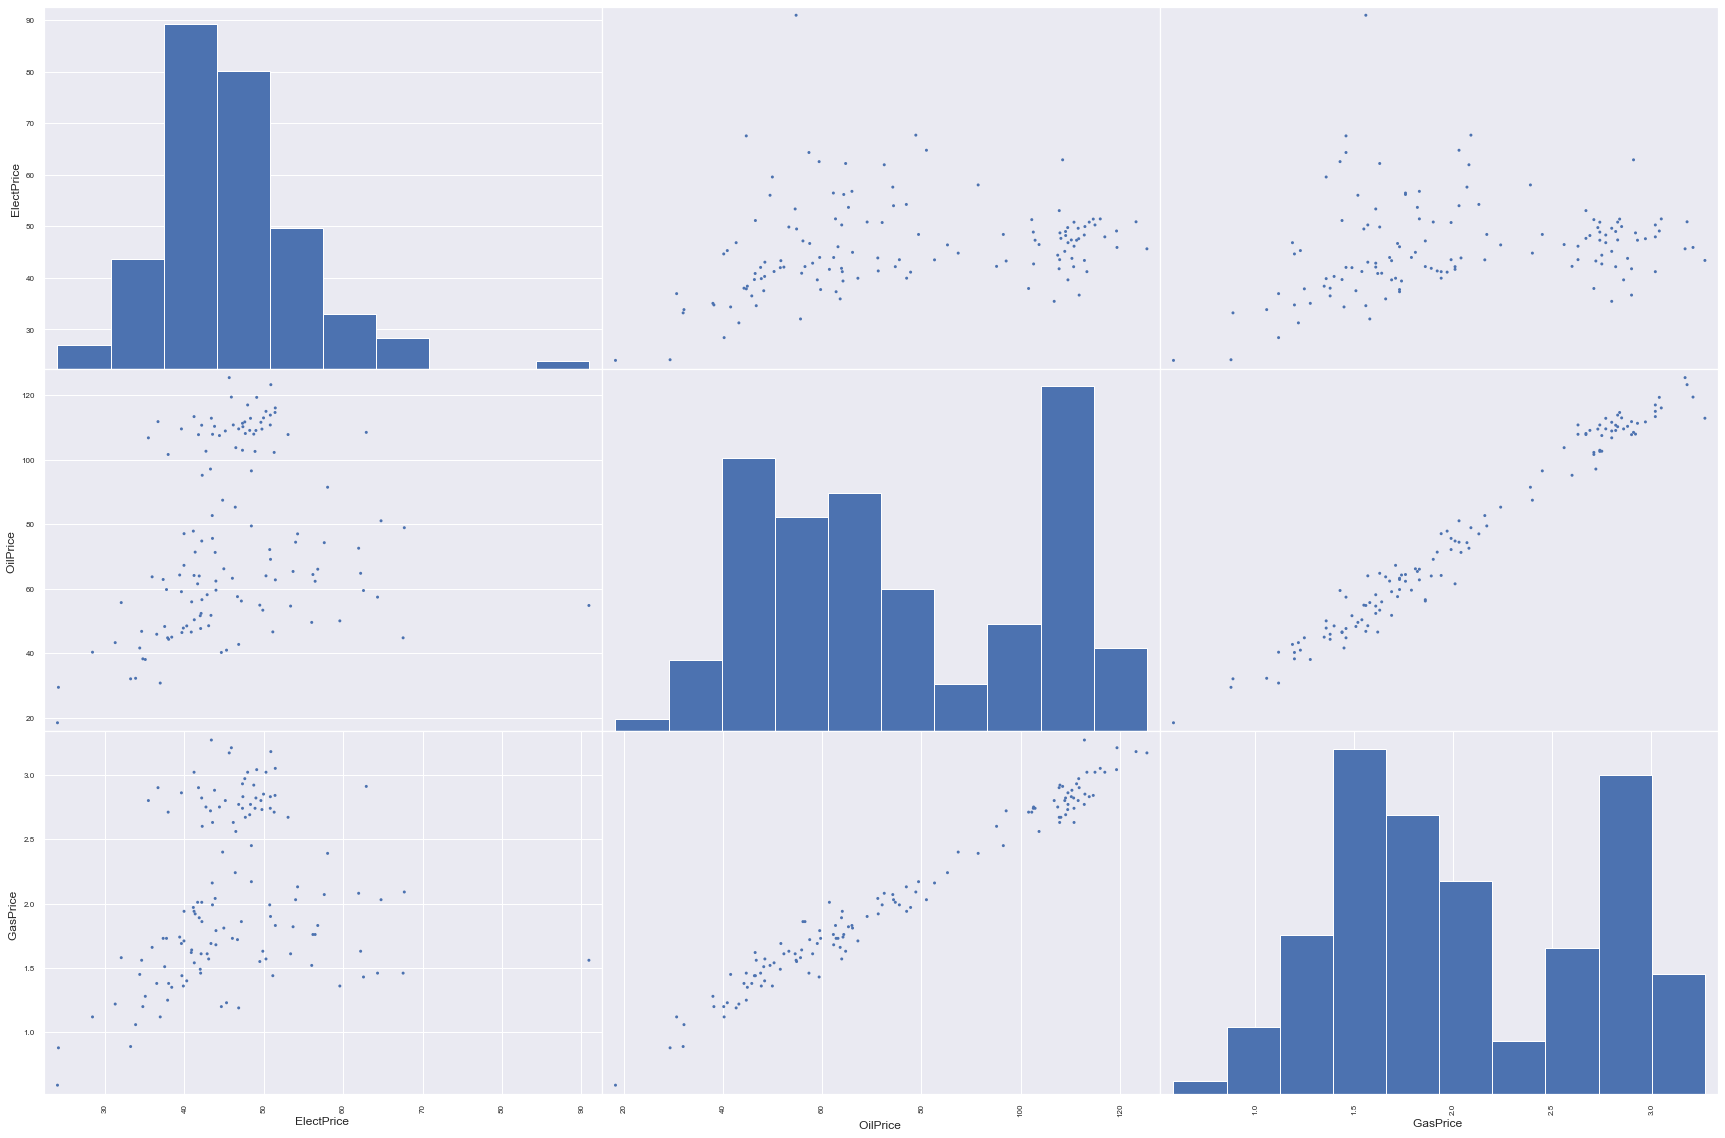

In [63]:
# we can define the plot with
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

# we can show the plot with
plt.show()

# we can see a right skewed normal distribution in the first plot, 
# however normality gets lost in the second and third plotlines. 

# 4 - Describe the Data Set

In [64]:
# lets get the data summary
desc_df = df.describe()

# then lets add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# and finally display it
desc_df

#As can be seen, we have some data exceeding 3 standard deviation distance, 
#Those values indicate the outliers due to being too far away from the avarage.

,ElectPrice,OilPrice,GasPrice
count,129.000000,129.000000,129.000000
mean,45.930233,75.783488,2.060930
std,9.064859,27.812875,0.642254
min,24.010000,18.380000,0.590000
25%,40.910000,52.310000,1.560000
50%,44.960000,67.220000,1.920000
75%,50.270000,107.790000,2.740000
max,90.940000,125.450000,3.270000
+3_std,73.124808,159.222112,3.987691
-3_std,18.735657,-7.655135,0.134169


In [65]:
#We can get rid of those outliers by removing the values exceeding 3 standard deviations as such;

remove_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]



# what rows were removed
df.index.difference(remove_df.index)

Int64Index([127], dtype='int64')

# 5 - Build the Model

In [89]:
# we define our input variable (X) & output variable
df_after = df.drop(['OilPrice', 'GasPrice'], axis = 0)

X = df_after.drop("ElectPrice")
Y = df_after[['ElectPrice']]

# then we split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# then create a Linear Regression model object
regression_model = LinearRegression()

# then pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

KeyError: "['OilPrice' 'GasPrice'] not found in axis"